## Global and individual reports

##### General observations 
* As one cold intuitively expect, there is a positive correlation between the number of customers and sales.
    * There are stores that usually receive a much larger number of customers and therefore generate a much higher volume of sales than the average. This is most likely due to their location.
    * One of the goals of commercial strategies should therefore be to optimize the relationship between the number of customers and the volume of sales generated. Ideally, every visitor to a store should become an effective buyer with a relative high expenditure.
    * Another reasonable goal is to increase the number of visitors as much as possible according to the location of the store.
    * In the exploratory data analysis (EDA), we could observe that there are more customers and more sales when a promotion is active (variable Promo in the sales database).
* Some other observations:
    * Stores that are open on Sundays generate high profits, but the ratio of customers to sales is not as high.
    * During the holidays there are generally more customers and sales, especially during Easter vacations and Christmas.

##### Import the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("Set2")
%matplotlib inline

##### Load the combined data for sales and store information

In [2]:
df = pd.read_csv("../data/sales_stores.csv", parse_dates=['Date'])

We create new features to analyze performance at a global and store level: average daily turnover, average daily number of customers and turnover per customer.

In [3]:
avgs = df.groupby('Store')[['Sales', 'Customers']].mean().reset_index()
avgs.rename({'Sales': 'AvgSales', 'Customers': 'AvgCustomers'}, axis=1, inplace=True)
# This is the same as total sales / total customers
avgs['SalesPerCustomer'] = avgs.apply(lambda x: x['AvgSales'] / x['AvgCustomers'], axis=1)
 
df = df.merge(avgs, on='Store', how='inner')
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,WeekOfYear,...,CompetitionOpenSince,Promo2,Promo2Since,PromoInterval,CompetitionTimeDays,CompetitionTimeMonths,PromoTimeWeeks,AvgSales,AvgCustomers,SalesPerCustomer
0,1,5,2015-07-31,5263,555,1,1,no_holiday,1,31,...,2008-09-01,0,NaN,NaN,2524,82,0,4759.096031,564.049936,8.437366
1,2,5,2015-07-31,6064,625,1,1,no_holiday,1,31,...,2007-11-01,1,2010-03-29,"Jan,Apr,Jul,Oct",2829,93,278,4953.900510,583.998724,8.482725
2,3,5,2015-07-31,8314,821,1,1,no_holiday,1,31,...,2006-12-01,1,2011-04-04,"Jan,Apr,Jul,Oct",3164,104,225,6942.568678,750.077022,9.255808
3,4,5,2015-07-31,13995,1498,1,1,no_holiday,1,31,...,2009-09-01,0,NaN,NaN,2159,70,0,9638.401786,1321.752551,7.292138
4,5,5,2015-07-31,4822,559,1,1,no_holiday,1,31,...,2015-04-01,0,NaN,NaN,121,3,0,4676.274711,537.340180,8.702634


We already took a look at the distributions of `Sales` and `Customers` in our first notebook and noted they both have long tails toward large values. Now we would like to see how the distributions of the variables `AvgSales`, `AvgCustomers` and `Customers` look like:

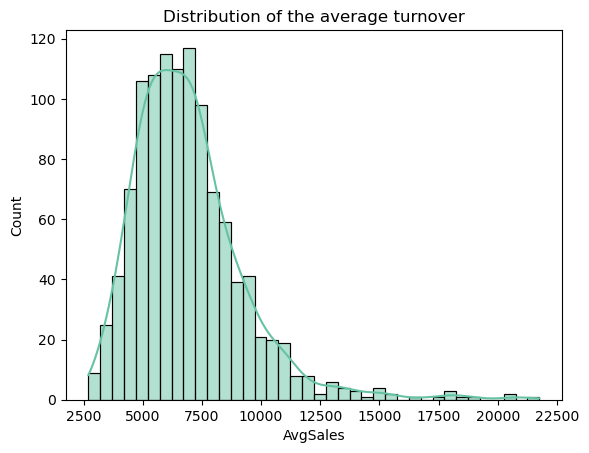

In [4]:
sns.histplot(avgs['AvgSales'], kde=True).set(title="Distribution of the average turnover");

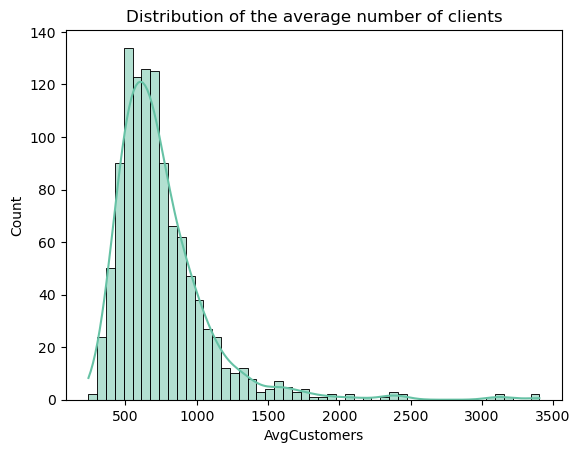

In [5]:
sns.histplot(avgs['AvgCustomers'], kde=True).set(title="Distribution of the average number of clients");

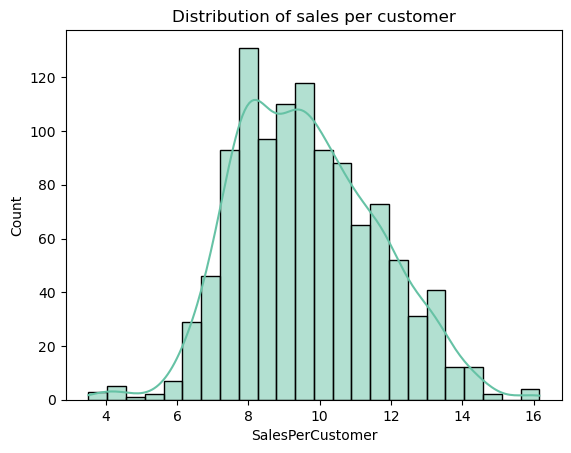

In [6]:
sns.histplot(avgs['SalesPerCustomer'], kde=True).set(title="Distribution of sales per customer");

In [7]:
avgs.describe()

,Store,AvgSales,AvgCustomers,SalesPerCustomer
count,1115.00000,1115.000000,1115.000000,1115.000000
mean,558.00000,6934.208449,754.510158,9.643756
std,322.01708,2383.911051,353.344414,1.986858
min,1.00000,2703.736573,240.183099,3.513703
25%,279.50000,5322.299969,541.468688,8.131856
50%,558.00000,6589.948470,678.667519,9.464061
75%,836.50000,7964.200644,866.203304,10.981168
max,1115.00000,21757.483418,3403.458599,16.162639


`AvgSales` and `AvgCustomers` have a long-tail distribution, just like `Sales` and `Customers`.